In [5]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D, MaxPool2D, BatchNormalization, Flatten, Dense, Dropout, GRU, Reshape
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [6]:
X_train = np.load('training_data\specs_train_processed.npy')
print(f"before: {X_train.shape}")
X_train = np.swapaxes(X_train,2,1)
print(f"after: {X_train.shape}")
X_train = np.expand_dims(X_train,3)
print(f"final: {X_train.shape}")
y_train = np.load('training_data\labels_train_processed.npy')

before: (7984, 100, 130)
after: (7984, 130, 100)
final: (7984, 130, 100, 1)


In [7]:
N_CLASSES = 10
model = Sequential(name="gtzan_crnn")

# Convolutional Block 1
model.add(Conv2D(filters=16, kernel_size=(3,3), input_shape=X_train.shape[1:])) # X_train holds the processed training spectrograms
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())

# Convolutional Block 2
model.add(Conv2D(filters=32, kernel_size=(3,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())

# Convolutional Block 3
model.add(Conv2D(filters=64, kernel_size=(3,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(BatchNormalization())

# Convolutional Block 4
model.add(Conv2D(filters=128, kernel_size=(3,3)))
model.add(MaxPool2D(pool_size=(1,5)))
model.add(BatchNormalization())

# Reshape Layer (effectively squeezes the frequency dimension away)
model.add(Reshape((12,128)))

# Recurrent Layer
model.add(GRU(256, return_sequences=False, activation="tanh"))

# Dense Layer
model.add(Dense(64))
model.add(Dropout(0.4))

# Output Layer
model.add(Dense(N_CLASSES, activation="softmax"))

In [8]:
model.compile(optimizer = keras.optimizers.RMSprop(learning_rate=0.0001,rho=0.9),
              loss = keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [9]:
x_valid = np.load('training_data\specs_val_processed.npy')
x_valid = np.swapaxes(x_valid,2,1)
x_valid = np.expand_dims(x_valid,3)
y_valid = np.load('training_data\labels_val_processed.npy')

In [10]:
model.fit(X_train, y_train, epochs = 25, validation_data = (x_valid, y_valid), batch_size=64)

Epoch 1/25
125/125 [==============================] - 67s 475ms/step - loss: 1.8807 - accuracy: 0.3225 - val_loss: 2.5096 - val_accuracy: 0.1010
Epoch 2/25
125/125 [==============================] - 58s 465ms/step - loss: 1.5799 - accuracy: 0.4449 - val_loss: 2.7610 - val_accuracy: 0.1889
Epoch 3/25
125/125 [==============================] - 60s 481ms/step - loss: 1.4448 - accuracy: 0.5009 - val_loss: 2.7066 - val_accuracy: 0.2747
Epoch 4/25
125/125 [==============================] - 58s 466ms/step - loss: 1.3114 - accuracy: 0.5521 - val_loss: 1.9897 - val_accuracy: 0.3455
Epoch 5/25
125/125 [==============================] - 67s 533ms/step - loss: 1.1984 - accuracy: 0.5966 - val_loss: 1.5620 - val_accuracy: 0.4343
Epoch 6/25
125/125 [==============================] - 62s 497ms/step - loss: 1.1170 - accuracy: 0.6187 - val_loss: 1.2788 - val_accuracy: 0.5768
Epoch 7/25
125/125 [==============================] - 64s 509ms/step - loss: 1.0274 - accuracy: 0.6533 - val_loss: 1.2498 - val_ac

In [11]:
x_test = np.load('training_data\specs_test_processed.npy')
x_test = np.swapaxes(x_test,2,1)
x_test = np.expand_dims(x_test,3)
y_test = np.load('training_data\labels_test_processed.npy')

In [15]:
model.evaluate(x=x_test, y=y_test)


32/32 [==============================] - 2s 72ms/step - loss: 1.8338 - accuracy: 0.6216


NameError: name 'y_prediction' is not defined

32/32 [==============================] - 2s 63ms/step
(1007,)
[[0.68831169 0.01298701 0.17105263 0.05555556 0.04       0.08
  0.         0.         0.03738318 0.01639344]
 [0.01298701 0.92207792 0.06578947 0.         0.00666667 0.04888889
  0.02439024 0.         0.         0.13114754]
 [0.07792208 0.01298701 0.47368421 0.         0.00666667 0.16888889
  0.02439024 0.025      0.01869159 0.18032787]
 [0.06493506 0.01298701 0.13157895 0.68055556 0.08666667 0.02222222
  0.01219512 0.0875     0.05607477 0.04918033]
 [0.02597403 0.         0.         0.01388889 0.56       0.00444444
  0.         0.0125     0.09345794 0.        ]
 [0.03896104 0.         0.01315789 0.01388889 0.         0.46666667
  0.         0.         0.         0.        ]
 [0.01298701 0.         0.01315789 0.02777778 0.08666667 0.03555556
  0.74390244 0.025      0.         0.19672131]
 [0.         0.         0.02631579 0.13888889 0.10666667 0.01777778
  0.01219512 0.8        0.00934579 0.03278689]
 [0.         0.         

## Confusion Matrix

In [35]:
genres = {
 0:'blues',
 1:'classical',
 2:'country',
 3:'disco',
 4:'hiphop',
 5:'jazz',
 6:'metal',
 7:'pop',
 8:'reggae',
 9:'rock'
}

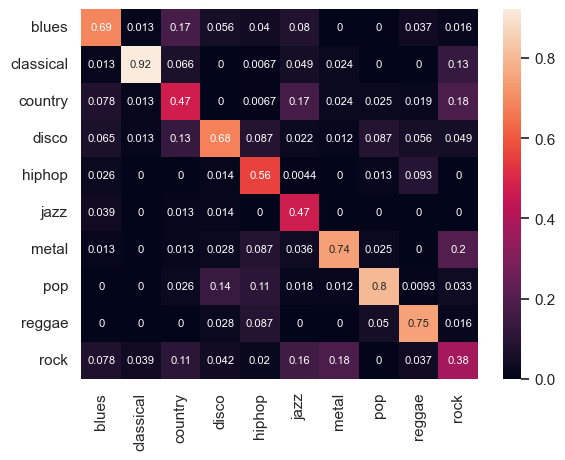

In [39]:

y_prediction = model.predict(x_test)
y_prediction = np.argmax (y_prediction, axis = 1)
result = confusion_matrix(y_test, y_prediction , normalize='pred')

df_cm = pd.DataFrame(result, (genres.values()), (genres.values()))
#plt.figure(figsize=(10,7))
sn.set(font_scale=1) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 8}) # font size

plt.show()